In [49]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [31]:
def clean_tweet(tweet): 
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split()) 
  

In [32]:
def get_tweet_sentiment(tweet): 
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(clean_tweet(tweet))
    polarity = analysis.sentiment.polarity
    # set sentiment 
    if polarity > 0: 
        return 'positive'
    elif polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [33]:
df = pd.read_csv('data/brexit-data.csv')

In [34]:
df.head()

,Unnamed: 0,user_name,tweet_text,reply_list,user_followers,user_location,user_verified,like_count,rt_count,timestamp
0,0,Margaret,RT @BrexitPlymouth: There are rumours that the...,NaN,1728,NaN,False,0,21,2019-10-25 18:26:44
1,1,Lesley Ellis (Lewis) #IstandwithJoanne,RT @2020Comms: @ChristineJameis @patineuse60 @...,NaN,294,NaN,False,0,14,2019-10-25 18:26:44
2,2,Kavitha,@ANDREW1ALBERTT @SaHreports My guess - brexit.,NaN,114,London,False,0,0,2019-10-25 18:26:44
3,3,🖤Paul Duffy #FBPE EU Citizen,RT @Otto_English: DID YOU KNOW Boris and Dom s...,NaN,2226,London,False,0,1580,2019-10-25 18:26:44
4,4,whisht,@mrjamesob \nDo you think it would be an good/...,NaN,20,London,False,0,0,2019-10-25 18:26:44


In [37]:
def process_textblob_analysis(dataframe):
    file_name = 'data/brexit-data-sentiment-textblob'
    for i, row in tqdm(dataframe.iterrows(), total=dataframe.shape[0]):
        df.loc[i, 'score'] = get_tweet_sentiment(dataframe.loc[i, 'tweet_text'])
    dataframe.to_csv('{}.csv'.format(file_name))    

In [38]:
process_textblob_analysis(df)

100%|██████████| 37808/37808 [02:11<00:00, 287.33it/s]


In [227]:
df = pd.read_csv('data/brexit-data-sentiment-textblob.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,user_name,tweet_text,reply_list,user_followers,user_location,user_verified,like_count,rt_count,timestamp,score
0,0,0,Margaret,RT @BrexitPlymouth: There are rumours that the...,NaN,1728,NaN,False,0,21,2019-10-25 18:26:44,positive
1,1,1,Lesley Ellis (Lewis) #IstandwithJoanne,RT @2020Comms: @ChristineJameis @patineuse60 @...,NaN,294,NaN,False,0,14,2019-10-25 18:26:44,neutral
2,2,2,Kavitha,@ANDREW1ALBERTT @SaHreports My guess - brexit.,NaN,114,London,False,0,0,2019-10-25 18:26:44,neutral
3,3,3,🖤Paul Duffy #FBPE EU Citizen,RT @Otto_English: DID YOU KNOW Boris and Dom s...,NaN,2226,London,False,0,1580,2019-10-25 18:26:44,negative
4,4,4,whisht,@mrjamesob \nDo you think it would be an good/...,NaN,20,London,False,0,0,2019-10-25 18:26:44,positive


In [228]:
def plot_tweet_sentiment(data):
    count = data['score'].value_counts()
    sizes = count.values
    labels = count.index
    colors = ['#66b3ff', '#99ff99', '#ff9999']
    explode = (0.05, 0.05, 0.05)
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()


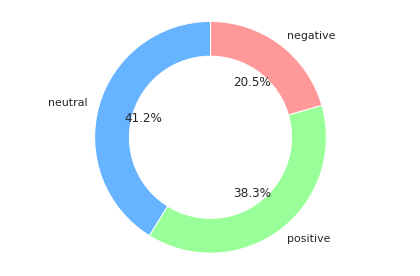

In [229]:
plot_tweet_sentiment(df)

In [230]:
count = df['score'].value_counts()
print(count)

neutral     15563
positive    14477
negative     7768
Name: score, dtype: int64


In [231]:
df['timestamp'].max()

'2019-10-25 18:26:44'

In [232]:
df['timestamp'].min()

'2019-10-25 16:15:57'

433


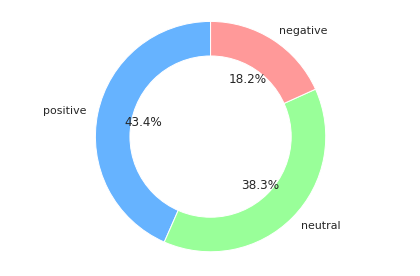

In [233]:
# wplyw user verified?

df_verified = df.loc[df['user_verified']]
print(df_verified['user_name'].count())
plot_tweet_sentiment(df_verified)

97


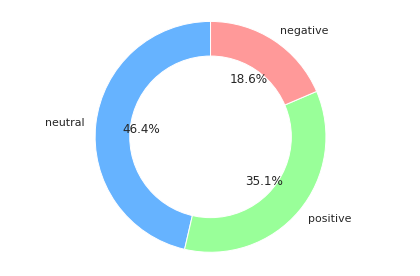

In [234]:
# wplyw followers number?

df_followers = df.loc[df['user_followers'] > 200000]
print(df_followers['user_name'].count())
plot_tweet_sentiment(df_followers)

3051


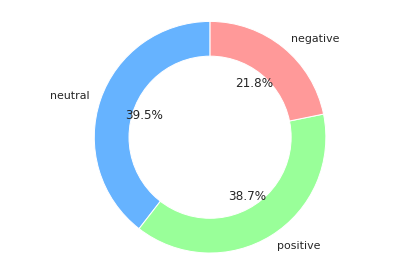

In [235]:
# wplyw location?
df_location = df[df.user_location.notnull()]
df_london = df_location.loc[df_location.user_location.str.contains('London')]
print(df_london['user_name'].count())
plot_tweet_sentiment(df_london)

22829


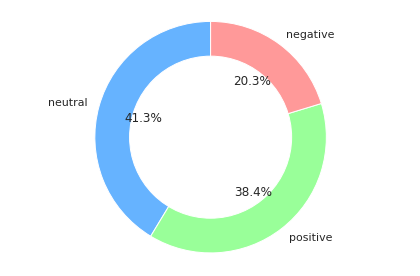

In [236]:
# wplyw location?
df_location = df[df.user_location.notnull()]
df_notlondon = df_location.loc[~df_location.user_location.str.contains('London')]
print(df_notlondon['user_name'].count())
plot_tweet_sentiment(df_notlondon)

331


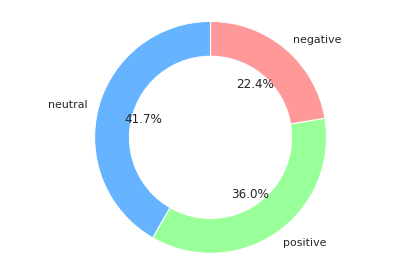

In [237]:
# wplyw location?
df_location = df[df.user_location.notnull()]
df_notlondon = df_location.loc[df_location.user_location.str.contains('Ireland')]
print(df_notlondon['user_name'].count())
plot_tweet_sentiment(df_notlondon)

16


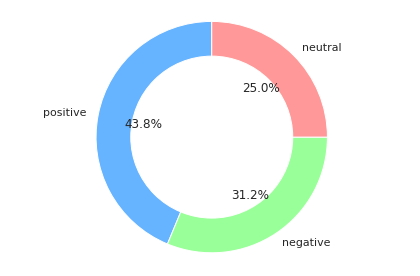

In [238]:
# wplyw likow?
df_like = df.loc[df['like_count'] > 300]
print(df_like['user_name'].count())
plot_tweet_sentiment(df_like)

98


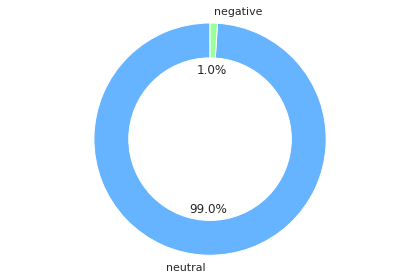

In [239]:
# wplyw retweetow?
df_detweet = df.loc[df['rt_count'] > 10000]
print(df_detweet['user_name'].count())
plot_tweet_sentiment(df_detweet)

6964


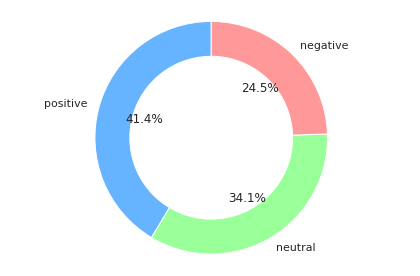

In [240]:
# wplyw retweetow?
df_detweet = df.loc[df['rt_count'] == 0]
print(df_detweet['user_name'].count())
plot_tweet_sentiment(df_detweet)